In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [6]:
with open("repositories.json") as file:
    repos = json.load(file)
repos[0]

{'id': 54346799,
 'node_id': 'MDEwOlJlcG9zaXRvcnk1NDM0Njc5OQ==',
 'name': 'public-apis',
 'full_name': 'public-apis/public-apis',
 'private': False,
 'owner': {'login': 'public-apis',
  'id': 51121562,
  'node_id': 'MDEyOk9yZ2FuaXphdGlvbjUxMTIxNTYy',
  'avatar_url': 'https://avatars.githubusercontent.com/u/51121562?v=4',
  'gravatar_id': '',
  'url': 'https://api.github.com/users/public-apis',
  'html_url': 'https://github.com/public-apis',
  'followers_url': 'https://api.github.com/users/public-apis/followers',
  'following_url': 'https://api.github.com/users/public-apis/following{/other_user}',
  'gists_url': 'https://api.github.com/users/public-apis/gists{/gist_id}',
  'starred_url': 'https://api.github.com/users/public-apis/starred{/owner}{/repo}',
  'subscriptions_url': 'https://api.github.com/users/public-apis/subscriptions',
  'organizations_url': 'https://api.github.com/users/public-apis/orgs',
  'repos_url': 'https://api.github.com/users/public-apis/repos',
  'events_url': 'ht

In [8]:
sizes = np.array([repo["size"] for repo in repos])
stargazers = np.array([repo["stargazers_count"] for repo in repos])
watchers = np.array([repo["watchers_count"] for repo in repos])
forks = np.array([repo["forks_count"] for repo in repos])
open_issues = np.array([repo["open_issues_count"] for repo in repos])
contributors = np.array([len(repo["total_contributors"]) for repo in repos])
contributions = np.array([sum([c["contributions"] for c in repo["total_contributors"]]) for repo in repos])
scores = np.array([repo["score"] for repo in repos])

df = pd.DataFrame({
    "size": sizes,
    "stargazers": stargazers,
    "watchers": watchers,
    "forks": forks,
    "open_issues": open_issues,
    "contributors": contributors,
    "contributions": contributions
})

df.head()

,size,stargazers,watchers,forks,open_issues,contributors,contributions
0,4997,293444,293444,31931,261,100,2825
1,11187,257108,257108,43831,425,100,299
2,6789,206774,206774,24510,416,100,1276
3,15030,180379,180379,43750,247,100,1745
4,330701,150547,150547,51395,715,12,374


/home/cr/Documents/hpi/out-of-date-docstrings/github-scraper/.venv/lib/python3.10/site-packages/pandas/core/arraylike.py:399: RuntimeWarning:

divide by zero encountered in log10



Text(0, 0.5, '')

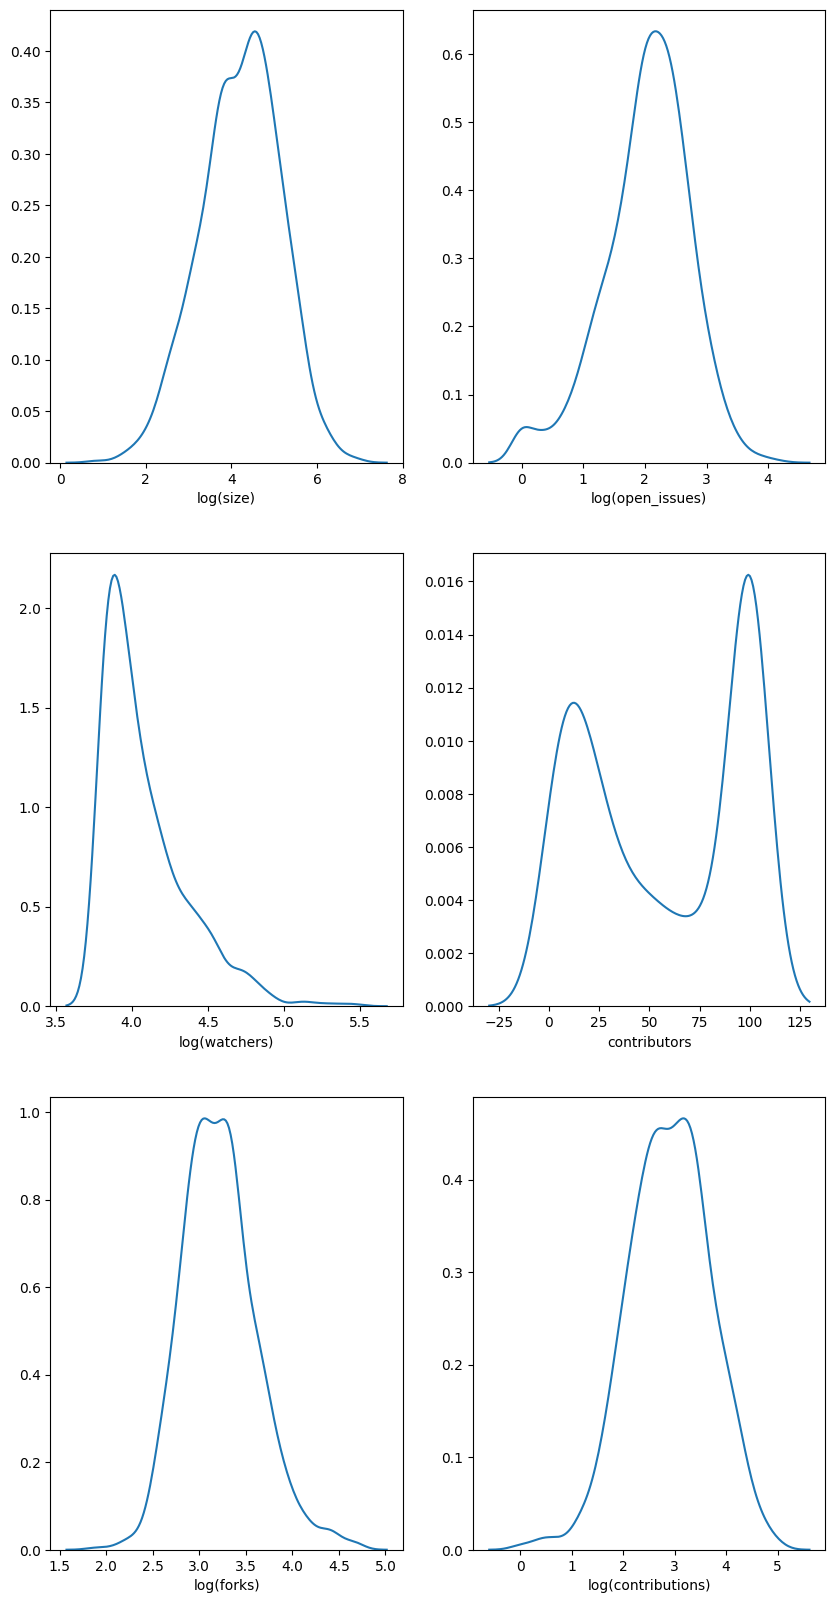

In [66]:
log_df = df.copy()
log_df["size"] = np.log10(df["size"])
log_df["watchers"] = np.log10(df["watchers"])
log_df["forks"] = np.log10(df["forks"])
log_df["open_issues"] = np.log10(df["open_issues"])
log_df["contributors"] = df["contributors"]
log_df["contributions"] = np.log10(df["contributions"])

log_df.replace(-np.inf, 0, inplace=True)


fig, axs = plt.subplots(3, 2)
fig.set_size_inches(10, 20)

sns.kdeplot(data=log_df, x="size", ax=axs[0, 0])
axs[0, 0].set_xlabel("log(size)")
sns.kdeplot(data=log_df, x="watchers", ax=axs[1, 0])
axs[1, 0].set_xlabel("log(watchers)")
sns.kdeplot(data=log_df, x="forks", ax=axs[2, 0])
axs[2, 0].set_xlabel("log(forks)")
sns.kdeplot(data=log_df, x="open_issues", ax=axs[0, 1])
axs[0, 1].set_xlabel("log(open_issues)")
sns.kdeplot(data=log_df, x="contributors", ax=axs[1, 1])
sns.kdeplot(data=log_df, x="contributions", ax=axs[2, 1])
axs[2, 1].set_xlabel("log(contributions)")

axs[0, 0].set_ylabel("")
axs[1, 0].set_ylabel("")
axs[2, 0].set_ylabel("")
axs[0, 1].set_ylabel("")
axs[1, 1].set_ylabel("")
axs[2, 1].set_ylabel("")

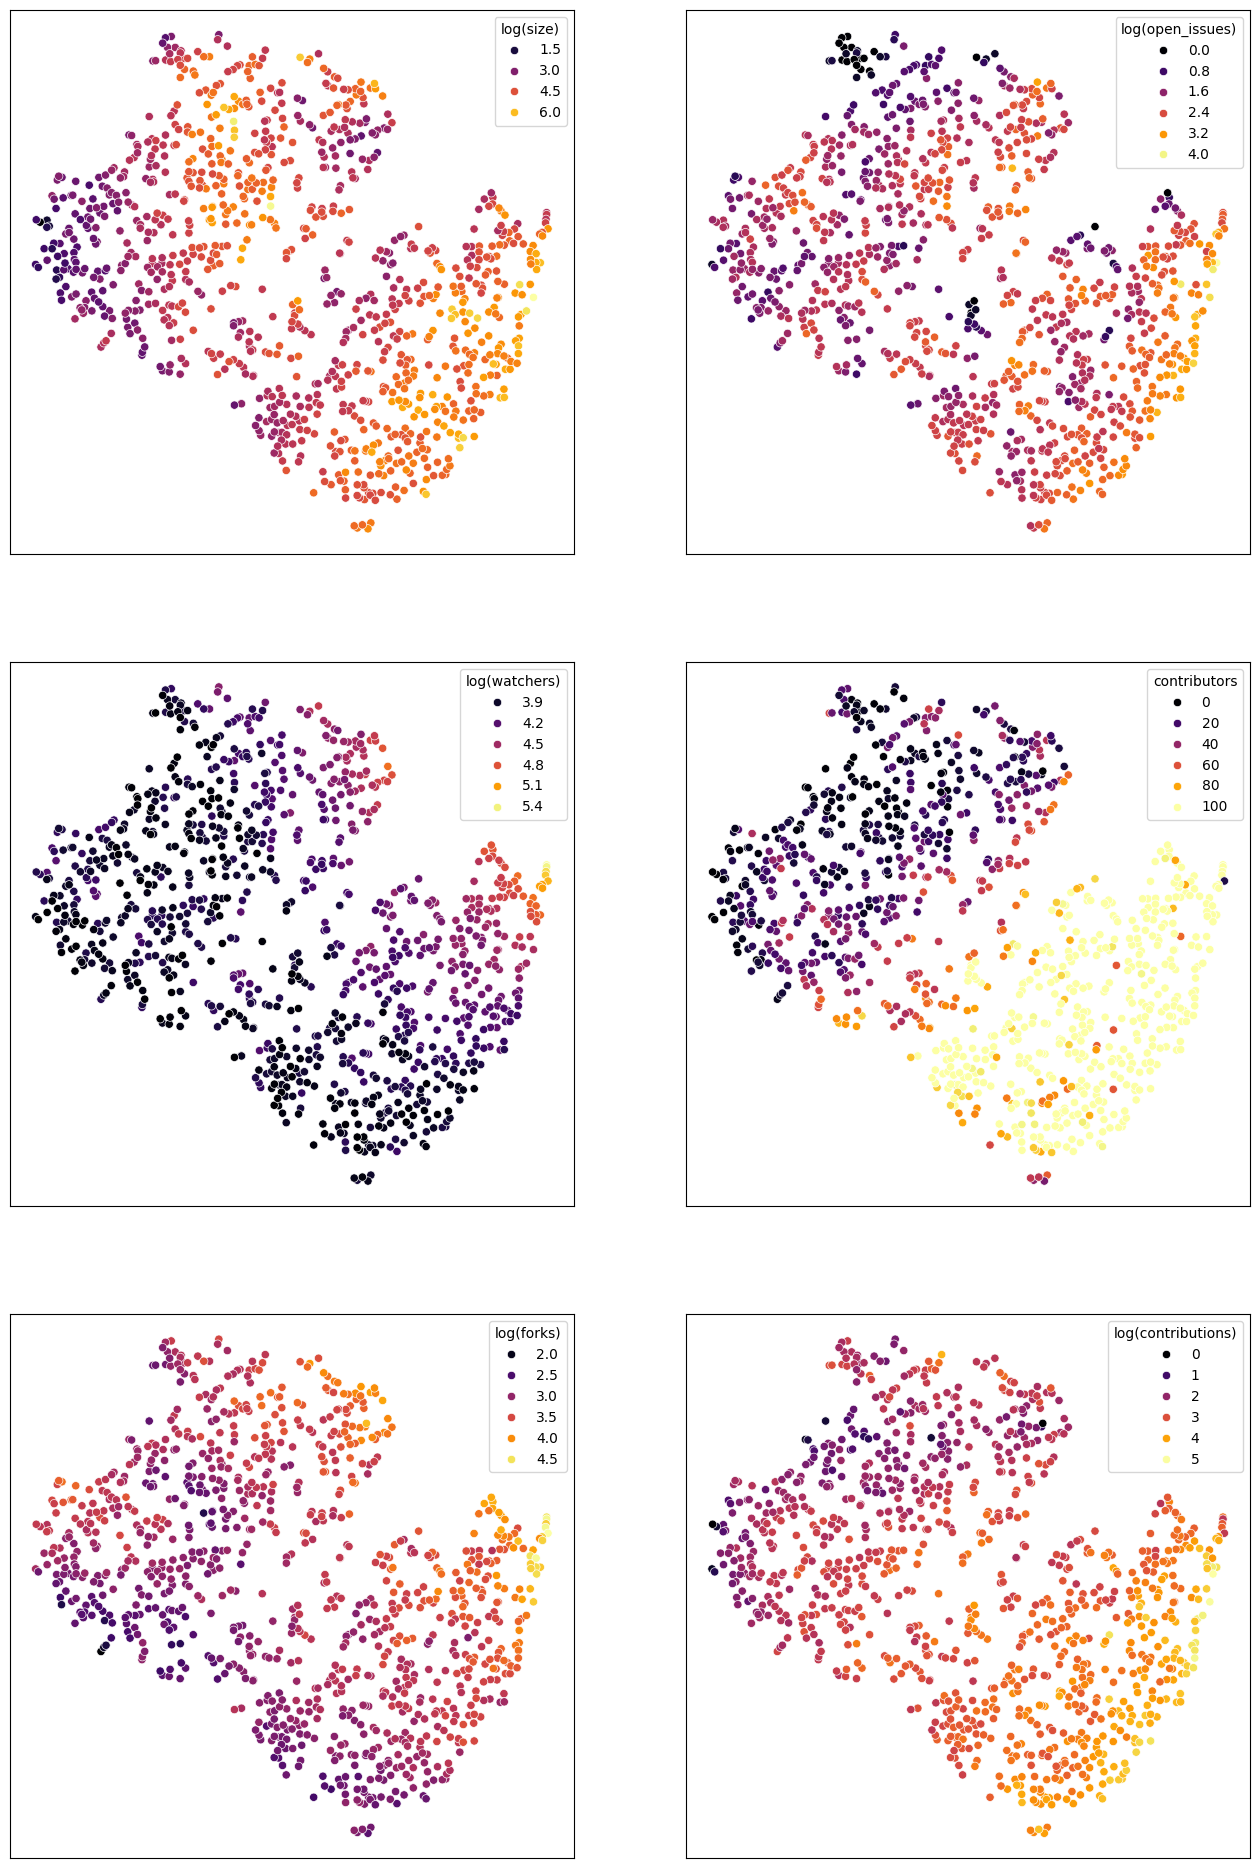

In [67]:
norm_df = log_df.copy()
norm_df = (norm_df - norm_df.mean()) / norm_df.std()

fig, axs = plt.subplots(3, 2)
fig.set_size_inches(16, 24)

tsne = TSNE(n_components=2, perplexity=30.0, early_exaggeration=3.0, init='pca', method='barnes_hut')
tsne_result = tsne.fit_transform(norm_df)
tsne_df = pd.DataFrame(tsne_result, columns=["tsne1", "tsne2"])

tsne_df['size'] = log_df['size']
tsne_fig = sns.scatterplot(tsne_df, x='tsne1', y='tsne2', hue='size', palette='inferno', ax=axs[0, 0])
tsne_fig.set_xlabel("")
tsne_fig.set_ylabel("")
tsne_fig.legend(title="log(size)")
tsne_fig.set_xticks([])
tsne_fig.set_yticks([])
tsne_df.drop('size', axis=1, inplace=True)

tsne_df['watchers'] = log_df['watchers']
tsne_fig = sns.scatterplot(tsne_df, x='tsne1', y='tsne2', hue='watchers', palette='inferno', ax=axs[1, 0])
tsne_fig.set_xlabel("")
tsne_fig.set_ylabel("")
tsne_fig.legend(title="log(watchers)")
tsne_fig.set_xticks([])
tsne_fig.set_yticks([])
tsne_df.drop('watchers', axis=1, inplace=True)

tsne_df['forks'] = log_df['forks']
tsne_fig = sns.scatterplot(tsne_df, x='tsne1', y='tsne2', hue='forks', palette='inferno', ax=axs[2, 0])
tsne_fig.set_xlabel("")
tsne_fig.set_ylabel("")
tsne_fig.legend(title="log(forks)")
tsne_fig.set_xticks([])
tsne_fig.set_yticks([])
tsne_df.drop('forks', axis=1, inplace=True)

tsne_df['open_issues'] = log_df['open_issues']
tsne_fig = sns.scatterplot(tsne_df, x='tsne1', y='tsne2', hue='open_issues', palette='inferno', ax=axs[0, 1])
tsne_fig.set_xlabel("")
tsne_fig.set_ylabel("")
tsne_fig.legend(title="log(open_issues)")
tsne_fig.set_xticks([])
tsne_fig.set_yticks([])
tsne_df.drop('open_issues', axis=1, inplace=True)

tsne_df['contributors'] = log_df['contributors']
tsne_fig = sns.scatterplot(tsne_df, x='tsne1', y='tsne2', hue='contributors', palette='inferno', ax=axs[1, 1])
tsne_fig.set_xlabel("")
tsne_fig.set_ylabel("")
tsne_fig.set_xticks([])
tsne_fig.set_yticks([])
tsne_df.drop('contributors', axis=1, inplace=True)

tsne_df['contributions'] = log_df['contributions']
tsne_fig = sns.scatterplot(tsne_df, x='tsne1', y='tsne2', hue='contributions', palette='inferno', ax=axs[2, 1])
tsne_fig.set_xlabel("")
tsne_fig.set_ylabel("")
tsne_fig.legend(title="log(contributions)")
tsne_fig.set_xticks([])
tsne_fig.set_yticks([])
tsne_df.drop('contributions', axis=1, inplace=True)
